In [ ]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo xlsx desde equipo
from google.colab import files#orden que hace que el código busque el documento en la computadora
files.upload()

In [ ]:
#Carga desde archivo .csv sin indice
last_mile_customer=pd.read_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer.csv")#lee el excel y se ponemos el nombre para que lo pueda leer
last_mile_customer

In [ ]:
#Verificamos información del DataFrame
last_mile_customer.info() #muestra toda la estructura de los datos del documento

In [ ]:
#Corroboramos valores nulos
valores_nulos=last_mile_customer.isnull().sum()#muestra los datos que tiene valores nulos y cuanto son
valores_nulos

Quitamos valores nulos


In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
last_mile_customer['picture_cargo_being_delivered_captions']=last_mile_customer['picture_cargo_being_delivered_captions'].fillna("picture_cargo_being_delivered_captions")
last_mile_customer#Usamos el metodo como manera de sustitucion de valores y se rellenan 


In [ ]:
#Corroboramos valores nulos
valores_nulos=last_mile_customer.isnull().sum()#muestra los datos que tiene valores nulos y cuanto son
valores_nulos

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
last_mile_customer['picture_cargo_being_delivered']=last_mile_customer['picture_cargo_being_delivered'].fillna("picture_cargo_being_delivered")
last_mile_customer#Usamos el metodo como manera de sustitucion de valores y se rellenan 


In [ ]:
#Corroboramos valores nulos
valores_nulos=last_mile_customer.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered              0
picture_ca

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
last_mile_customer['picture_cargo_being_delivered_urls']=last_mile_customer['picture_cargo_being_delivered_urls'].fillna("picture_cargo_being_delivered_urls")
last_mile_customer#Usamos el metodo como manera de sustitucion de valores y se rellenan 

In [ ]:
#Corroboramos valores nulos
valores_nulos=last_mile_customer.isnull().sum()#muestra los datos que tiene valores nulos y cuanto son
valores_nulos

In [ ]:
#Corroboramos valores nulos
valores_nulos=last_mile_customer.isnull().sum().sum()#Comprobamos que ya no haya valores nulos
valores_nulos

0

**Procedimiento "Cuantiles" para sustituir outliers en dataframe**

<Figure size 1080x576 with 0 Axes>

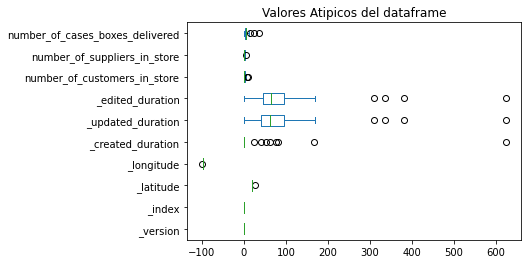

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8))#muestra el tamaño en que se muestra la imagen
last_mile_customer.plot(kind='box',vert=False)#genera la caja o bigote y la grafica de todas las columnas que contengan valores atípicos
plt.title("Valores Atipicos del dataframe")# coloca el nombre de la grafica
plt.show()# Dibujamos el diagrama 


In [ ]:
from numpy.lib.function_base import percentile  
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=last_mile_customer['number_of_customers_in_store']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido 5.0
Limite interior permitido -3.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=last_mile_customer[(y<Limite_Superior_iqr)|(y>Limite_Inferior_iqr)]
outliers_iqr#encuentra los valores que se salen del rango de los límites

In [ ]:
#Obtenemos datos limpios
data_clean_iqr=last_mile_customer[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr#genera los datos limpios de la columna sin valores atípicos

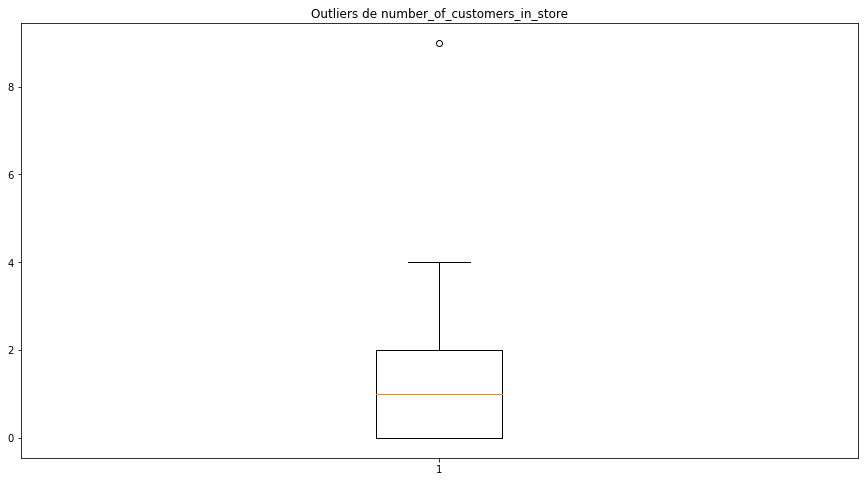

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8)) #muestra el tamaño de la figura
plt.boxplot(data_clean_iqr["number_of_customers_in_store"])#gráfica la caja con los valores ya dentro de los límites de una columna
plt.title("Outliers de number_of_customers_in_store") #titulo de la grafica
plt.show()# Dibujamos el diagrama 


In [ ]:
#Realizamos una copia del dataframe
micro=last_mile_customer.copy()

In [ ]:
from numpy.lib.function_base import percentile
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=micro['number_of_suppliers_in_store']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos                

Limite superior permitido 3.5
Limite interior permitido -0.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=last_mile_customer[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr=micro[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

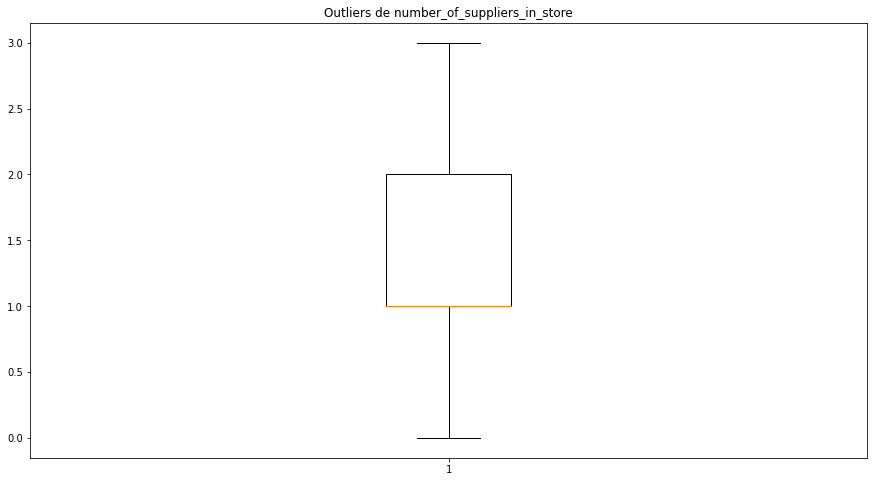

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8)) #muestra el tamaño de la figura
plt.boxplot(data_clean_iqr["number_of_suppliers_in_store"])#gráfica la caja con los valores ya dentro de los límites de una columna
plt.title("Outliers de number_of_suppliers_in_store") #titulo de la grafica
plt.show()# Dibujamos el diagrama 



In [ ]:
#Realizamos una copia del dataframe
data3=data_clean_iqr.copy()

In [ ]:
from numpy.lib.function_base import percentile
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=micro['number_of_cases_boxes_delivered']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 12.0
Limite inferior permitido -4.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

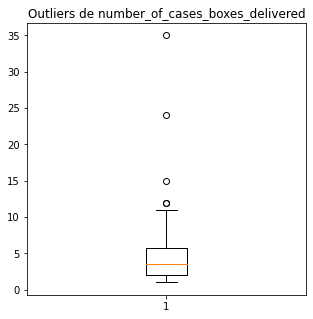

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,5))
plt.boxplot(data_clean_iqr["number_of_cases_boxes_delivered"])
plt.title("Outliers de number_of_cases_boxes_delivered")
plt.show()# Dibujamos el diagrama 

In [ ]:
#Realizamos una copia del dataframe
data3=data_clean_iqr.copy()

In [ ]:
from numpy.lib.function_base import percentile
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=micro['_edited_duration']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 172.0
Limite inferior permitido -32.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=last_mile_customer[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

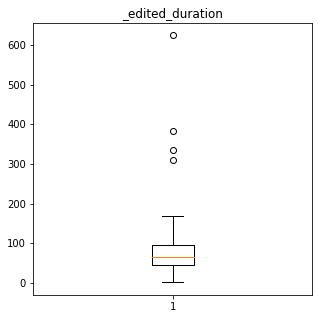

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,5))
plt.boxplot(data_clean_iqr["_edited_duration"])
plt.title("_edited_duration")
plt.show()# Dibujamos el diagrama 

In [ ]:
#Realizamos una copia del dataframe
data3=data_clean_iqr.copy()

In [ ]:
from numpy.lib.function_base import percentile
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=last_mile_customer['_updated_duration']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 177.25
Limite inferior permitido -40.75


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,7))#Tamaño de la grafica
plt.boxplot(data_clean_iqr["_updated_duration"])#pone los valores dentro d elos limites
plt.title("_updated_duration")#se pone el titulo del caja
plt.show()# Dibujamos el diagrama 

In [ ]:
from numpy.lib.function_base import percentile  
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=last_mile_customer['_created_duration']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido 0.0
Limite interior permitido 0.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,7))#Tamaño de la grafica
plt.boxplot(data_clean_iqr["_created_duration"])#pone los valores dentro d elos limites
plt.title("_created_duration")#se pone el titulo del caja
plt.show()# Dibujamos el diagrama 

In [ ]:
from numpy.lib.function_base import percentile  
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=last_mile_customer['_longitude']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido -98.181766665
Limite interior permitido -98.31911062500001


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,7))#Tamaño de la grafica
plt.boxplot(data_clean_iqr["_longitude"])#pone los valores dentro d elos limites
plt.title("_longitude")#se pone el titulo del caja
plt.show()# Dibujamos el diagrama 

In [ ]:
from numpy.lib.function_base import percentile  
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=last_mile_customer['_latitude']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido 19.11896076250001
Limite interior permitido 18.935810422499998


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,7))#Tamaño de la grafica
plt.boxplot(data_clean_iqr["_latitude"])#pone los valores dentro d elos limites
plt.title("_latitude")#se pone el titulo del caja
plt.show()# Dibujamos el diagrama 

**Convertir DataSet sin valores nulos a CSV**

In [ ]:
#Convertir dataframe a CSV
micro.to_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer_NUEVO.csv")
#Descargar archivo filtrado en csv
from google.colab import files


files.download("lastmile_delivery_operations_mit_lift_lab_serving_customer_NUEVO.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>